In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
f0 = np.load('/data/readout/resonances/current.npy')[range(11)+range(13,18)]

In [59]:
from kid_readout.roach import baseband
from kid_readout.utils import acquire, data_file, sweeps
reload(acquire)


<module 'kid_readout.utils.acquire' from '/home/gjones/kid_readout/kid_readout/utils/acquire.pyc'>

In [5]:
ri = baseband.RoachBaseband()

Loaded ROACH state from /data/readout/roach_config.npz


In [6]:
ri.set_dac_atten(31)

In [7]:
coarse = acquire.sweep(ri, f0, 19)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

writing DRAM bank 1

writing DRAM bank 2

writing DRAM bank 3

detected mcnt overflow None 3973183 0 16384 0 32 3973183
detected mcnt overflow None 565310 0 16384 0 96 565310
detected mcnt overflow None 3973180 0 16384 0 192 3973180
detected mcnt overflow None 565307 0 16384 0 256 565307
detected mcnt overflow None 303162 0 16384 0 336 303162


In [11]:
coarse_res = acquire.fit_sweep_data(coarse,delay_estimate=coarse.hardware_delay_estimate)

In [12]:
r0 = coarse_res[0]

In [14]:
s21c = r0.normalize(r0.freq_data,r0.s21_data,remove_amplitude=False)

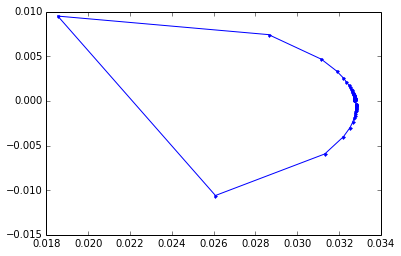

In [15]:
plot(s21c.real,s21c.imag,'.-')

In [16]:
coarse_f0 = [r.f_0 for r in coarse_res]

In [19]:
fine = acquire.sweep(ri, np.array(coarse_f0), 21)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

writing DRAM bank 1

writing DRAM bank 2

writing DRAM bank 3

detected mcnt overflow None 2138176 0 16384 0 176 2138176


In [28]:
fine_res = acquire.fit_sweep_data(fine,delay_estimate=fine.hardware_delay_estimate,model=acquire.delayed_generic_s21,guess=acquire.delayed_generic_guess)

In [29]:
fine_f0 = [r.f_0 for r in fine_res]

In [30]:
r0 = fine_res[0]

In [31]:
s21c = r0.normalize(r0.freq_data,r0.s21_data,remove_amplitude=False)

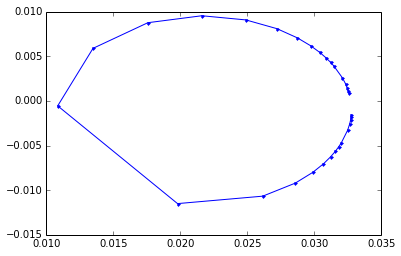

In [32]:
plot(s21c.real,s21c.imag,'.-')

In [35]:
ri.add_tone_freqs(np.array(fine_f0))

bank_offset= 3 start_offset= 130023424 start_offset_bytes= 58720256
writing DRAM bank 3



array([  77.47119141,   84.63964844,   86.2590332 ,   92.24536133,
        103.44116211,  109.28222656,  111.59960938,  116.08178711,
        119.55517578,  133.84716797,  134.54223633,  134.99243164,
        141.66650391,  149.95605469,  156.03540039,  159.61206055])

In [52]:
import time

In [69]:
ri.add_tone_freqs(np.array(fine_f0),overwrite_last=True)
ri.select_bank(ri.tone_bins.shape[0]-1)
ri._sync()
#time.sleep(1)
d,addr = ri.get_data_seconds(10)

bank_offset= 3 start_offset= 130023424 start_offset_bytes= 58720256
writing DRAM bank 3

detected mcnt overflow None 3186752 0 16384 0 160 3186752


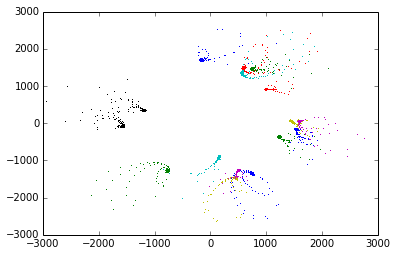

In [70]:
blah = plot(d.real,d.imag,',')

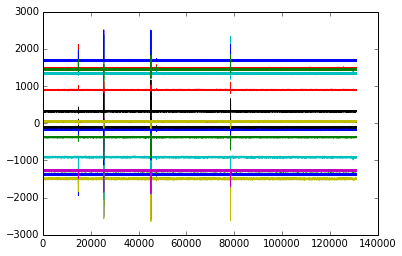

In [71]:
blah = plot(d.imag)

In [126]:
ri.set_dac_atten(37)

In [127]:
fine2 = sweeps.do_prepared_sweep(ri,nchan_per_step=16)

detected mcnt overflow None 3186752 0 16384 0 400 3186752
detected mcnt overflow None 3186751 0 16384 0 288 3186751


In [128]:
fine_res2 = acquire.fit_sweep_data(fine2,delay_estimate=fine.hardware_delay_estimate,model=acquire.delayed_generic_s21,guess=acquire.delayed_generic_guess)

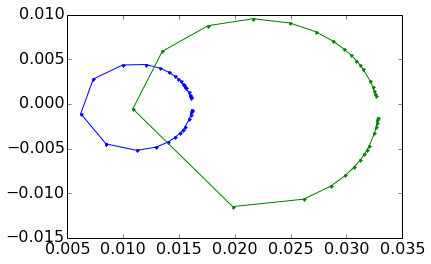

In [129]:
for r0 in [fine_res2[0],fine_res[0]]:
    s21c = r0.normalize(r0.freq_data,r0.s21_data,remove_amplitude=False)
    plot(s21c.real,s21c.imag,'.-')
    

In [130]:
fine2_f0 = [r.f_0 for r in fine_res2]

In [131]:
ri.add_tone_freqs(np.array(fine2_f0),overwrite_last=True)
ri.select_bank(ri.tone_bins.shape[0]-1)
ri._sync()
#time.sleep(1)
d,addr = ri.get_data_seconds(10)

bank_offset= 3 start_offset= 130023424 start_offset_bytes= 58720256
writing DRAM bank 3

detected mcnt overflow None 1089600 0 16384 0 7248 1089600


In [132]:
df = data_file.DataFile(suffix='long_timestream')

In [133]:
df.log_hw_state(ri)

In [134]:
df.add_sweep(fine2)

'sweep_20150929141645'

In [137]:
2**25/(256e6/2**14)

2147.483648

In [138]:
d,addr = ri.get_data_seconds(1800)

detected mcnt overflow None 1089600 0 16384 0 3440 1089600
detected mcnt overflow None 1089600 0 32768 1 19824 1089600
detected mcnt overflow None 1089600 0 49152 2 36208 1089600
detected mcnt overflow None 1089600 0 65536 3 52592 1089600
detected mcnt overflow None 1089600 0 81920 4 68976 1089600
detected mcnt overflow None 1089600 0 98304 5 85360 1089600
detected mcnt overflow None 1089600 0 114688 6 101744 1089600
detected mcnt overflow None 1089600 0 131072 7 118128 1089600
detected mcnt overflow None 1089600 0 147456 8 134512 1089600
detected mcnt overflow None 1089600 0 163840 9 150896 1089600
detected mcnt overflow None 1089600 0 180224 10 167280 1089600
detected mcnt overflow None 1089600 0 196608 11 183664 1089600
detected mcnt overflow None 1089600 0 212992 12 200048 1089600
detected mcnt overflow None 1089600 0 229376 13 216432 1089600
detected mcnt overflow None 1089600 0 245760 14 232816 1089600
detected mcnt overflow None 1089600 0 262144 15 249200 1089600
detected mcnt o

In [139]:
df.add_timestream_data(d,ri,time.time())

In [140]:
df.close()

In [141]:
d.shape

(33554432, 16)

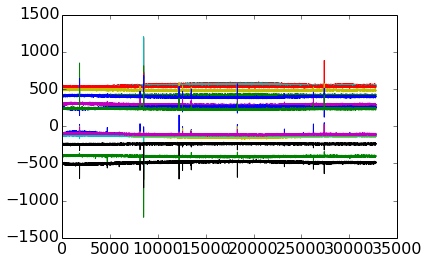

In [142]:
blah= plot(d[::1024,:].real)

In [144]:
np.array(fine2_f0)-np.array(fine_f0)

array([-0.00031637, -0.00036672, -0.0004066 , -0.00043177, -0.00057987,
       -0.00060331, -0.00064455, -0.0006751 , -0.00071977, -0.00089003,
       -0.00092247, -0.00089955, -0.00100471, -0.001067  , -0.00108559,
       -0.00113808])

In [145]:
np.save('/data/readout/resonances/0813f12_130mK_fits.npy',np.array(fine2_f0))